In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
mouse_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Found DataFrame.duplicated in web search - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

#mouse_unique = mouse_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID".unique()

mouse_unique = mouse_data_df.loc[mouse_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()

mouse_unique

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# Come back to if time.


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_drop = mouse_data_df.drop_duplicates(mouse_unique)
# mouse_drop = mouse_data_df.drop_duplicates[[mouse_unique]]
# mouse_drop = mouse_data_df.loc[mouse_data_df.drop_duplicates(["Mouse ID"]),"g989"]
# mouse_clean = mouse_data_df.drop_duplicates(["Mouse ID"]) - Kills ALL duplicate Mouse IDs

mouse_clean = mouse_data_df.drop_duplicates(["Mouse ID", "Timepoint"])

In [9]:
# Checking to see if dropping duplicate worked

mouse_clean.loc[mouse_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()

array([], dtype=object)

In [10]:
# Another check to see how mouse counts were effected.  Numbers are good after the drop.

mouse_clean.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_mean = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
mouse_median = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
mouse_variance = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
mouse_stddev = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_stddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
mouse_sem = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
mouse_summary_df = pd.DataFrame({"Mean": mouse_mean,
                                "Median": mouse_median,
                                "Variance": mouse_variance,
                                "Standard Dev": mouse_stddev,
                                "SEM": mouse_sem})

mouse_summary_df["Mean"] = mouse_summary_df["Mean"].map('{:.2f}'.format)
mouse_summary_df["Median"] = mouse_summary_df["Median"].map('{:.2f}'.format)
mouse_summary_df["Variance"] = mouse_summary_df["Variance"].map('{:.2f}'.format)
mouse_summary_df["Standard Dev"] = mouse_summary_df["Standard Dev"].map('{:.2f}'.format)
mouse_summary_df["SEM"] = mouse_summary_df["SEM"].map('{:.2f}'.format)

mouse_summary_df

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment.<p>
Using the aggregation method, produce the same summary statistics in a single line

In [17]:
#FAILS
#mouse_method_df = (mouse_clean.groupby('Drug Regimen').agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])['Tumor Volume (mm3)']) 
#mouse_method = mouse_clean.groupby('Drug Regimen')
#mouse_method_df = mouse_method.agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])['Tumor Volume (mm3)']
#mouse_method_df = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])
#mouse_summary_df.agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])
#mouse_summary = pd.to_numeric(mouse_summary_df)
#mouse_method_df = mouse_clean.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

mouse_method_df = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

mouse_method_df["mean"] = mouse_method_df["mean"].map('{:.2f}'.format)
mouse_method_df["median"] = mouse_method_df["median"].map('{:.2f}'.format)
mouse_method_df["var"] = mouse_method_df["var"].map('{:.2f}'.format)
mouse_method_df["std"] = mouse_method_df["std"].map('{:.2f}'.format)
mouse_method_df["sem"] = mouse_method_df["sem"].map('{:.2f}'.format)

mouse_method_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots
#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

In [18]:
# Getting a count for each column then narrowing it down to just Mouse ID.
# mouse_clean.groupby(['Drug Regimen']).count()

drug_regimen_dp = mouse_clean.groupby(['Drug Regimen']).count()['Mouse ID']
drug_regimen_dp

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

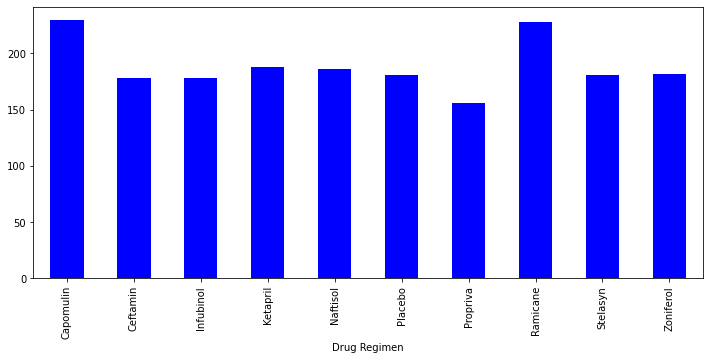

In [19]:

drug_regimen_dp.plot(kind="bar", figsize=(12,5), color='blue')

plt.show()


#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

(0.0, 240.0)

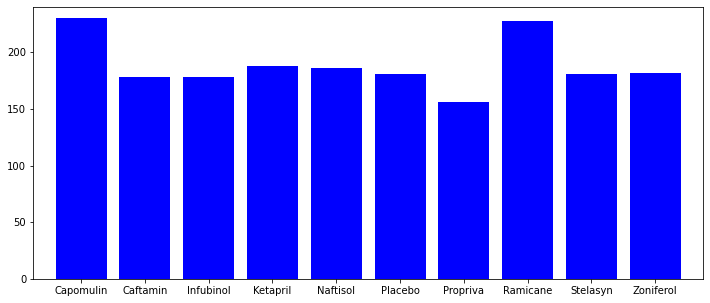

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(drug_regimen_dp))
drug_regimen_name = ['Capomulin',
                    'Caftamin',
                    'Infubinol',
                    'Ketapril',
                    'Naftisol',
                    'Placebo',
                    'Propriva',
                    'Ramicane',
                    'Stelasyn',
                    'Zoniferol']

plt.figure(figsize=(12,5))
plt.bar(x_axis, drug_regimen_dp, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen_name)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_dp)+10.0)

#drug_regimen_py.bar()

## Pie Plots
#### Generate a pie plot showing the distribution of female versus male mice using pandas

In [21]:
mouse_by_gender = mouse_metadata.groupby('Sex').count()
mouse_by_gender

#genderpie = mouse_metadata.groupby('Sex').count()
#genderpie.head()
#testsex = mouse_clean.('Mouse ID').unique()
#testsex.head

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [22]:
test_gender = mouse_clean.groupby(['Mouse ID', 'Sex'])
#test_gender.head()

test_gender_two_df = pd.DataFrame(test_gender.size())
test_gender_two_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [23]:
# Grouping together each sex of mice with counts of both
mouse_gender_df = pd.DataFrame(test_gender_two_df.groupby(['Sex']).count())

# Renaming column to usable data
mouse_gender_df.columns = ['Count']

mouse_gender_df

,Count
Sex,
Female,124
Male,125


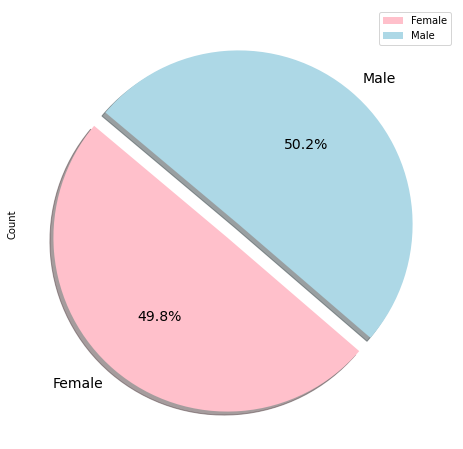

In [24]:
colors = ['pink', 'lightblue']
explode = (0.1, 0)

plot = mouse_gender_df.plot.pie(y='Count', explode=explode, colors=colors,
       autopct='%1.1f%%', figsize=(10,8), shadow=True, fontsize=14, startangle=140)

#### Generate a pie plot showing the distribution of female versus male mice using pyplot

In [26]:
mouse_by_gender = mouse_metadata.groupby('Sex').count()
mouse_by_gender = mouse_by_gender.rename(columns={"Mouse ID": "Count"})
mouse_by_gender

#genderpie = mouse_metadata.groupby('Sex').count()
#genderpie.head()
#testsex = mouse_clean.('Mouse ID').unique()
#testsex.head

,Count,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

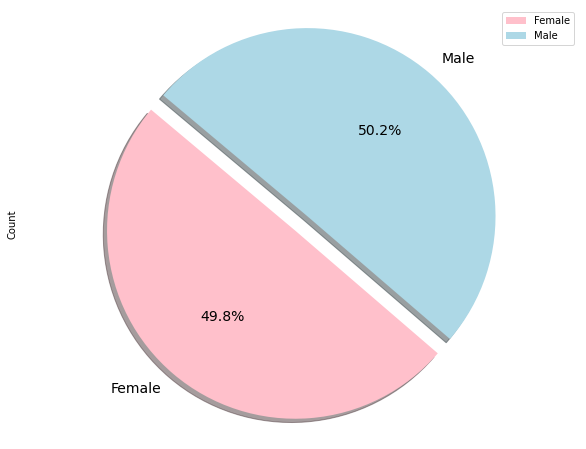

In [27]:
colors = ['pink', 'lightblue']
explode = (0.1, 0)

mouse_by_gender.plot(kind='pie', y = 'Count', explode=explode, colors=colors,
       autopct='%1.1f%%', figsize=(10,8), shadow=True, fontsize=14, startangle=140)

plt.axis('equal')

## Quartiles, Outliers and Boxplots
### Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

#### Capomulin

In [35]:
# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin',:]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_last_df = pd.DataFrame(capomulin_last)

capomulin_last_df.head()

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45


In [33]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_last_df = pd.DataFrame(capomulin_last)
capomulin_last_merge = pd.merge(capomulin_last_df, mouse_clean, on=('Mouse ID', 'Timepoint'), 
                                how='left')
capomulin_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


#### Ramicane

In [37]:
# Start by getting the last (greatest) timepoint for each mouse
ramicane_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Ramicane',:]
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last_df = pd.DataFrame(ramicane_last)

ramicane_last_df.head()

,Timepoint
Mouse ID,
a411,45
a444,45
a520,45
a644,45
c458,30


In [38]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_last_df = pd.DataFrame(ramicane_last)
ramicane_last_merge = pd.merge(ramicane_last_df, mouse_clean, on=('Mouse ID', 'Timepoint'), 
                                how='left')
ramicane_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


#### Infubinol

In [39]:
# Start by getting the last (greatest) timepoint for each mouse
infubinol_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Infubinol',:]
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last_df = pd.DataFrame(infubinol_last)

infubinol_last_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a577,30
a685,45
c139,45


In [40]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_last_df = pd.DataFrame(infubinol_last)
infubinol_last_merge = pd.merge(infubinol_last_df, mouse_clean, on=('Mouse ID', 'Timepoint'), 
                                how='left')
infubinol_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


#### Ceftamin

In [41]:
# Start by getting the last (greatest) timepoint for each mouse
ceftamin_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Ceftamin',:]
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_df = pd.DataFrame(ceftamin_last)

ceftamin_last_df.head()

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15


In [42]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_last_df = pd.DataFrame(ceftamin_last)
ceftamin_last_merge = pd.merge(ceftamin_last_df, mouse_clean, on=('Mouse ID', 'Timepoint'), 
                                how='left')
ceftamin_last_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
